***Step 0***<br/>
Import necessary libraries

In [90]:
import requests
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import matplotlib.pyplot as plt
%matplotlib inline  

***Step 1***<br/>
Get a consumer_key by creating a new Pocket application <br/>
Link: https://getpocket.com/developer/apps/new

***Step 2***<br/>
Get a request token

In [2]:
# pocket_api variable stores the http response
pocket_api = requests.post('https://getpocket.com/v3/oauth/request',
                           data = {'consumer_key':'82710-efa2906be95b400ce9fad6f8',
                                   'redirect_uri':'https://google.com'})


In [3]:
pocket_api.status_code 

200

In [4]:
pocket_api.text


'code=3df2b245-ceb0-3a72-b494-9f47e6'

***STEP 3***<br/>
Authenticate<br/> 
- Modify and paste the link below in the browser and authenticate <br/> 
- Replace text after "?request_token=" with the request_token generated above<br/> 
https://getpocket.com/auth/authorize?request_token=PASTE-YOUR-REQUEST-TOKEN-HERE&amp;amp;amp;amp;amp;amp;amp;amp;amp;redirect_uri=https://getpocket.com/connected_application

https://getpocket.com/auth/authorize?request_token=9080cc45-e147-e924-5c39-d4f6a7&amp;amp;amp;amp;amp;amp;amp;amp;amp;redirect_uri=https://getpocket.com/connected_application

 **STEP 4**
- Generate an access_token
- After authenticating in the browser, return here
- Use your consumer_key and request_token below

In [5]:
pocket_auth = requests.post('https://getpocket.com/v3/oauth/authorize',
                            data = {'consumer_key':'82710-efa2906be95b400ce9fad6f8',
                                    'code':'9080cc45-e147-e924-5c39-d4f6a7'})

In [6]:
pocket_auth.status_code


403

In [7]:
# Finally, here is your access_token
# We're done authenticating
pocket_auth.text

'403 Forbidden'

Get Data from the api

In [8]:
# Get data from the API
# Reference: https://getpocket.com/developer/docs/v3/retrieve
pocket_add = requests.post('https://getpocket.com/v3/get',
                           data= {'consumer_key':'82710-efa2906be95b400ce9fad6f8',
                                  'access_token':'81159e5f-c60a-dadd-0b50-1b1c40',
                                  'state':'all',
                                  'detailType':'simple'})
 
# Check the response: if 200, then it means all OK
# pocket_add.status_code
 
# Here is your fetched JSON data
#pocket_add.text

In [77]:
json_data = json.loads(pocket_add.text)

df= pd.DataFrame.from_dict(json_data['list']).T

df = df[['item_id','status','favorite','given_title','given_url','resolved_url','time_added','time_read','time_to_read','word_count']]
df.head()

,item_id,status,favorite,given_title,given_url,resolved_url,time_added,time_read,time_to_read,word_count
2153281756,2153281756,0,0,Working With JSON Data in Python – Real Python,https://realpython.com/python-json/,https://realpython.com/python-json/,1545314311,0,16,3517
2137887466,2137887466,0,0,Analyzing 10 Years of My Facebook Data - Lee ...,https://www.leejamesrobinson.com/blog/analyzin...,https://www.leejamesrobinson.com/blog/analyzin...,1545312169,0,4,934
2011240772,2011240772,0,0,CastBox 101: How to Download and Organize Podc...,https://medium.com/@castbox.fm/castbox-101-how...,https://medium.com/@castbox.fm/castbox-101-how...,1545310006,0,NaN,327
237938806,237938806,0,0,Pocket Developer Program: Pocket API: Retrieve,https://getpocket.com/developer/docs/v3/retrieve,https://getpocket.com/developer/docs/v3/retrieve,1545248521,0,4,858
1243533370,1243533370,0,0,Add Pocket API using Python - Tutorial,http://saideepchandg.github.io/pocket/2016/02/...,https://saideepchandg.github.io/pocket/2016/02...,1545248076,0,NaN,229


In [78]:
# Clean up the dataset
# Chek NaN
df.notnull().apply(pd.Series.value_counts)



,item_id,status,favorite,given_title,given_url,resolved_url,time_added,time_read,time_to_read,word_count
False,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,1241,4
True,2522.0,2522.0,2522.0,2522.0,2522.0,2518,2522.0,2522.0,1281,2518


In [79]:
available = df.notnull()
mask= available['word_count']&available['time_to_read']
df = df[mask]

In [81]:
# Clean up the dataset
df.dtypes
df[['status','favorite','word_count','time_to_read']] = df[['status','favorite','word_count','time_to_read']].astype(int)
df['time_added'] = pd.to_datetime(df['time_added'],unit='s')
df['time_read'] = pd.to_datetime(df['time_read'],unit='s')
df['date_added'] = df['time_added'].dt.date
df['date_read'] = df['time_read'].dt.date
 
# Save the dataframe as CSV locally
df.to_csv('pocket_list.csv')
 
# Check the data types
df.dtypes

item_id                 object
status                   int32
favorite                 int32
given_title             object
given_url               object
resolved_url            object
time_added      datetime64[ns]
time_read       datetime64[ns]
time_to_read             int32
word_count               int32
date_added              object
date_read               object
dtype: object

In [82]:
# Answer questions using data
 
# How many items are there in my Pocket?
print(df['item_id'].count())
 
# What % of articles are read?
print((df['status'].sum()*100)/df['item_id'].count())


1281
97.26775956284153


In [84]:
# How long is the average article in my Pocket? (minutes)
df['time_to_read'].describe()

count    1281.000000
mean        8.053084
std         9.016495
min         3.000000
25%         4.000000
50%         6.000000
75%         9.000000
max       155.000000
Name: time_to_read, dtype: float64

In [86]:
# How long is the average article in my Pocket? (word count)
df['word_count'].describe()

count     1281.000000
mean      1765.597190
std       1985.287671
min        550.000000
25%        837.000000
50%       1249.000000
75%       2053.000000
max      34197.000000
Name: word_count, dtype: float64

In [88]:
# How many words have I read till date?
print(df.loc[df['status'] == 1, 'word_count'].sum())
 
# How many books is this equivalent to?
print(df.loc[df['status'] == 1, 'word_count'].sum()/64000)


2196062
34.31346875


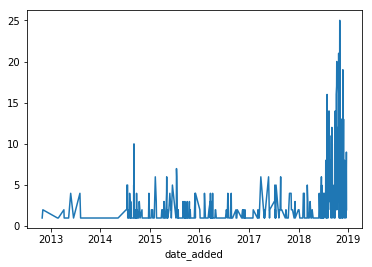

In [97]:
# How were the articles added over time?
plot_added = df.groupby('date_added')['item_id'].count()
plot_added.plot()


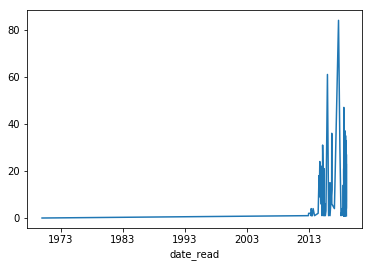

In [99]:
# How were the articles read over time?
plot_read = df.groupby('date_read')['status'].sum()
plot_read.plot()

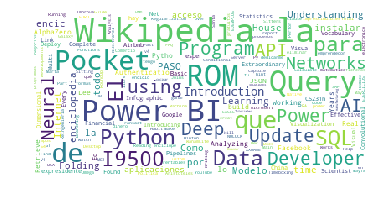

In [100]:
from wordcloud import WordCloud, STOPWORDS
 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=300,
                      max_font_size=40, 
                      random_state=42
                      ).generate(str(df['given_title']))
 
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("Pocket Wordcloud.png", dpi=900)